In [545]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [546]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [547]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/AkankshaKaple/Machine_Learning_Algorithms/master/ML_Algorithms/Regression/Multi%20linear%20regression/airfoil_self_noise.dat.txt",sep='\t')

In [548]:
dataframe.sample()

,800,0,0.3048,71.3,0.00266337,126.201
1220,4000,22.2,0.0254,71.3,0.021418,123.917


In [549]:
dataframe.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']

In [550]:
dataframe.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

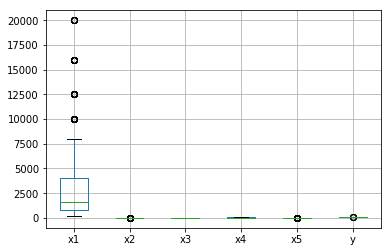

In [551]:
dataframe.boxplot()

In [552]:
dataframe = preprocess_obj.remove_outlier(dataframe)

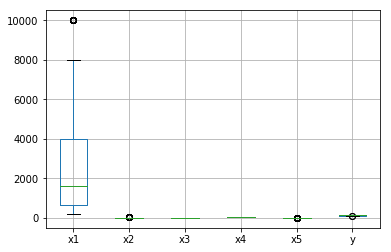

In [553]:
dataframe.boxplot()

In [554]:
dataframe.isna().sum()

x1    44
x2     0
x3     0
x4     0
x5    32
y      2
dtype: int64

In [555]:
dataframe = dataframe.dropna()

In [556]:
dataframe.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

In [557]:
dataframe.shape

(1426, 6)

In [558]:
dataframe.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ddde72e8>,
      dtype=object)

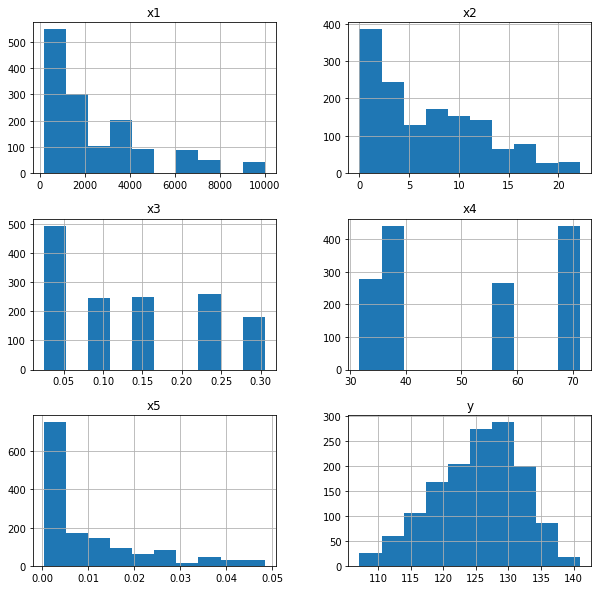

In [559]:
dataframe.hist(figsize=(10,10))

In [560]:
dataframe, test_data = preprocess_obj.split(dataframe,400)

In [561]:
dataframe.head()

,x1,x2,x3,x4,x5,y
0,1000.0,0.0,0.3048,71.3,0.002663,125.201
1,1250.0,0.0,0.3048,71.3,0.002663,125.951
2,1600.0,0.0,0.3048,71.3,0.002663,127.591
3,2000.0,0.0,0.3048,71.3,0.002663,127.461
4,2500.0,0.0,0.3048,71.3,0.002663,125.571


In [562]:
# normalize
dataframe = np.sqrt(np.sqrt(dataframe))

In [563]:
dataframe.head()

,x1,x2,x3,x4,x5,y
0,5.623413,0.0,0.743026,2.905845,0.227174,3.345045
1,5.946036,0.0,0.743026,2.905845,0.227174,3.350043
2,6.324555,0.0,0.743026,2.905845,0.227174,3.360896
3,6.687403,0.0,0.743026,2.905845,0.227174,3.360039
4,7.071068,0.0,0.743026,2.905845,0.227174,3.347514


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2df160c50>,
      dtype=object)

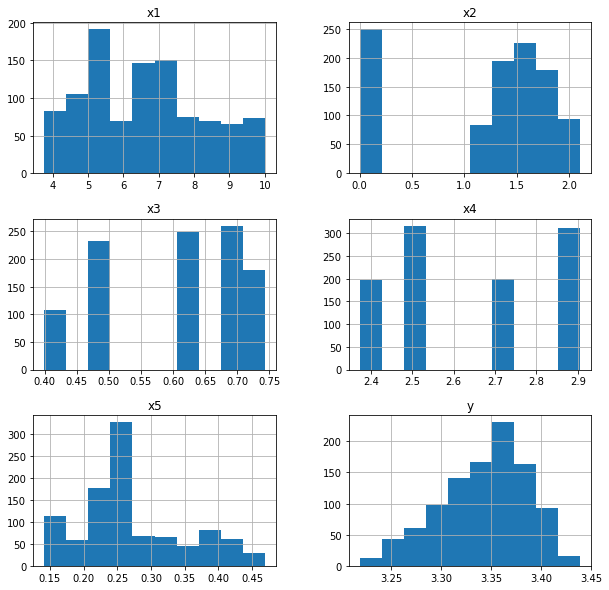

In [564]:
dataframe.hist(figsize=(10,10))

In [565]:
# standardize
dataframe = preprocess_obj.standardize(dataframe)

In [566]:
dataframe.head()

,x1,x2,x3,x4,x5,y
0,1.577729,-0.969811,-0.633202,0.346606,-0.866896,0.545574
1,1.622827,-0.949875,-0.628386,0.307412,-0.851583,0.499605
2,1.667861,-0.927534,-0.622620,0.264932,-0.834309,0.451670
3,1.706304,-0.906750,-0.616418,0.228687,-0.817984,0.406161
4,1.742578,-0.885457,-0.609304,0.194530,-0.801026,0.358680


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ddbb4a90>,
      dtype=object)

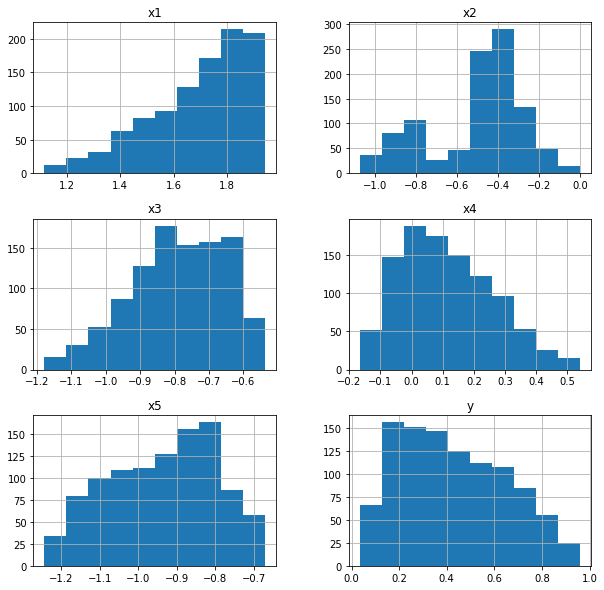

In [567]:
dataframe.hist(figsize=(10,10))

In [568]:
dataframe.head()

,x1,x2,x3,x4,x5,y
0,1.577729,-0.969811,-0.633202,0.346606,-0.866896,0.545574
1,1.622827,-0.949875,-0.628386,0.307412,-0.851583,0.499605
2,1.667861,-0.927534,-0.622620,0.264932,-0.834309,0.451670
3,1.706304,-0.906750,-0.616418,0.228687,-0.817984,0.406161
4,1.742578,-0.885457,-0.609304,0.194530,-0.801026,0.358680


In [569]:
class Normal_Function:
    
    def init(self):
        pass
    
    def train(self,dataframe):
        dataframe,Y = preprocess_obj.separate(dataframe,'y')
#         dataframe.insert(loc=0, column='dummy', value=pd.Series(np.ones(dataframe.shape[0])))
        left = np.linalg.inv(np.matmul(dataframe.T,dataframe))
        right = np.matmul(dataframe.T,Y)
        print(left,"\n",right)
        weights = np.matmul(left,right)
        return weights
    
    def test(self,test_data,weights):
#         test_data.insert(loc=0, column='dummy', value=pd.Series(np.ones(test_data.shape[0])))
        test_data,Y = preprocess_obj.separate(test_data,'y')
        Y = np.array(Y).reshape(Y.shape[0],1)
#         print(test_data.shape,"\n",Y.shape)
#         weights=weights.T
        Ypred = np.matmul(test_data,weights)
        error = np.divide(np.subtract(Ypred,Y),Y.sum())
        error = np.divide(np.abs(np.sum(error)),test_data.shape[0])
        print("Accuracy = ",(1-error)*100)

    def main(dataframe,test_data):
        weights = self.train(dataframe)
        print("Weights\n",weights)
        self.test(test_data,weights)
        

In [570]:
normal = Normal_Function()
# normal.main(dataframe,test_data)

In [571]:
weights = normal.train(dataframe)

[[ 0.08285194  0.08837548  0.12396507  0.16035578  0.01653318]
 [ 0.08837548  0.11214066  0.17464346  0.16466466 -0.02806496]
 [ 0.12396507  0.17464346  0.51492161  0.19825698 -0.28076314]
 [ 0.16035578  0.16466466  0.19825698  0.36692513  0.07804324]
 [ 0.01653318 -0.02806496 -0.28076314  0.07804324  0.29187712]] 
 [ 699.87845172 -216.61984809 -364.2005349    77.94469844 -435.07277803]


In [574]:
normal.test(test_data,weights)

(400, 5) 
 (400, 1)
Accuracy =  95.02794143689502
